In [ ]:
#tasvirlarni o'qish, tahrirlash va obyektlarni aniqlash uchun keng qo'llaniladi.

#pip install opencv-python

In [1]:
import cv2

img = cv2.imread("sari.jpg")

if img is None:
    print("Rasm topilmadi yoki yuklanmadi!")
    exit()

cv2.imshow("Image Window", img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
#Google tomonidan yaratilgan kutubxona bo'lib, odam yuzini aniqlash, qo'l harakatlarini kuzatish va tana pozitsiyalarini tanib olish uchun ishlatiladi

#pip install mediapipe

In [10]:
import cv2  # OpenCV kutubxonasini import qilish
import mediapipe as mp  # Mediapipe kutubxonasini import qilish

# Mediapipe yuzni aniqlash modelini chaqirish
mp_face = mp.solutions.face_detection.FaceDetection()

# Rasmni yuklash
img = cv2.imread("sari.jpg")  # "sari.jpg" faylini o'qish

if img is None:  # Agar rasm yuklanmasa, xatolikni chiqarish
    print("Rasm topilmadi yoki yuklanmadi!")
    exit()  # Dasturdan chiqish

# Rasmni BGR (OpenCV format) dan RGB formatiga o'zgartirish
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Mediapipe yordamida yuzni aniqlash
result = mp_face.process(rgb_img)

# Yuz aniqlangan bo'lsa, to'rtburchakni chizish
if result.detections:  # Agar yuzlar aniqlangan bo'lsa
    h, w, _ = img.shape  # Rasmning balandligi (h) va kengligi (w) ni olish
    for detection in result.detections:  # Har bir aniqlangan yuz uchun
        bbox = detection.location_data.relative_bounding_box  # Yuzning to'rtburchak koordinatalarini olish
        # Yuzni ekranda ko'rsatish uchun koordinatalarni hisoblash
        x, y, w_box, h_box = int(bbox.xmin * w), int(bbox.ymin * h), int(bbox.width * w), int(bbox.height * h)
        # Yashil rangdagi to'rtburchak chizish
        cv2.rectangle(img, (x, y), (x + w_box, y + h_box), (0, 255, 0), 2)

# Yuzni aniqlagan rasmni ko'rsatish
cv2.imshow("Face Detection", img)

# Yuzni aniqlagan rasmni yangi faylga saqlash
cv2.imwrite("sari_with_face_detection.jpg", img)  # "sari_with_face_detection.jpg" nomi bilan saqlash

# Klaviaturadan tugma bosilishini kutish (0 bo'lsa, tugma bossa)
cv2.waitKey(0)

# Barcha oynalarni yopish
cv2.destroyAllWindows()


In [ ]:
#tasvirlarni tahrirlash va yaratish uchun ishlatiladi (masalan, o'lchamini o'zgartirish yoki aylantirish).
#pip install Pillow

In [11]:
from PIL import Image  # PIL - tasvirlarni qayta ishlash uchun kutubxona
from PIL import ImageDraw, ImageFont  # Matn qo'shish va chizish uchun kutubxonalar

# Rasmni ochish
img = Image.open("sari.jpg")  # "sari.jpg" faylini ochish. Bu yerda o'zingizning haqiqiy rasm nomingizni kiriting

# Dastlabki rasmni ko'rsatish
img.show()  # "img" obyekti yordamida tasvirni ko'rsatish. Bu dastlabki rasmni oynada ko'rsatadi.

# Rasmning o'lchamini o'zgartirish
img_resized = img.resize((300, 300))  # resize() funksiyasi orqali tasvirni 300x300 pikselga o'zgartirish
img_resized.show()  # O'zgartirilgan rasmni ko'rsatish

# Rasmni saqlash
img_resized.save("sari_resized.jpg")  # "sari_resized.jpg" nomi bilan rasmni saqlash

# Rasmning formatini tekshirish
print(f"Rasm formati: {img_resized.format}")  # Rasmning formatini (JPEG, PNG va h.k.) chiqarish

# Rasmning o'lchamini tekshirish
print(f"Rasm o'lchami: {img_resized.size}")  # Rasmning o'lchamini (kenglik, balandlik) chiqarish

# Rasmning rang rejimini ko'rsatish
print(f"Rasmning rang rejimi: {img_resized.mode}")  # Rasmning rang rejimi (RGB, L - qora va oq) chiqarish

# Rasmni kesish (crop) - (left, upper, right, lower) koordinatalarini belgilash
img_cropped = img_resized.crop((50, 50, 250, 250))  # Bu yerda tasvirning chap yuqori nuqtasi (50, 50) va o'ng pastki nuqtasi (250, 250)
img_cropped.show()  # Kesilgan rasmni ko'rsatish
img_cropped.save("sari_cropped.jpg")  # Kesilgan rasmni saqlash

# Rasmga matn qo'shish
draw = ImageDraw.Draw(img_resized)  # Tasvirga chizish uchun draw obyekti yaratish
font = ImageFont.load_default()  # Matn uchun standart shriftni olish
draw.text((50, 50), "SARVARBEK!", font=font, fill=(255, 255, 255))  # Rasmga matn qo'shish
img_resized.show()  # O'zgartirilgan rasmni ko'rsatish
img_resized.save("sari_with_text.jpg")  # Matn qo'shilgan rasmni saqlash

# Rasmni aylantirish (rotate)
img_rotated = img_resized.rotate(45)  # 45 daraja aylantirish
img_rotated.show()  # Aylantirilgan rasmni ko'rsatish
img_rotated.save("sari_rotated.jpg")  # Aylantirilgan rasmni saqlash


Rasm formati: None
Rasm o'lchami: (300, 300)
Rasmning rang rejimi: RGB


In [ ]:
#image processing uchun mo'ljallangan kutubxona, Tasvirni o'qish va yozish, Tasvirni tahrirlash, Rangli tasvirlarni kulrang formatga o'tkazish, Rasmni filtrlar orqali qayta ishlash, Tasvirni segmentatsiya qilish, Morfologik operatsiyalar, Fazoviy analiz va xususiyatlarni aniqlash.

#pip install scikit-image matplotlib


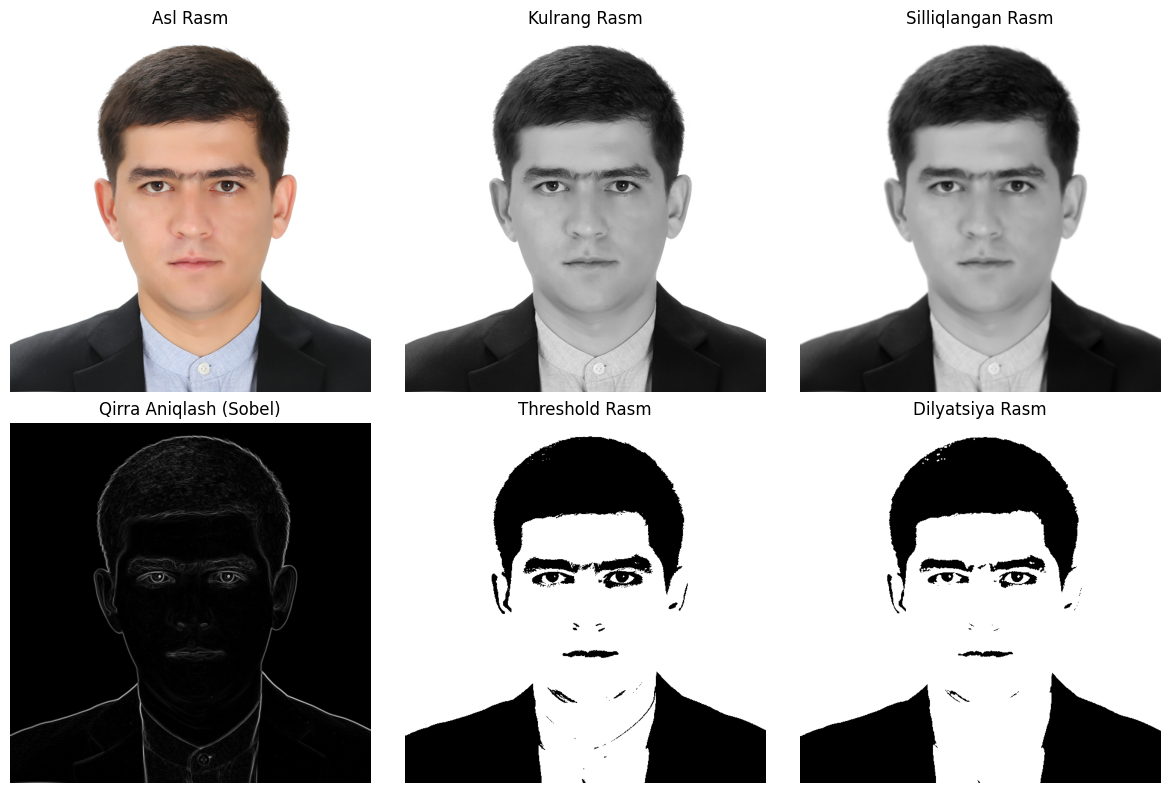

In [4]:
import numpy as np  # Numpy kutubxonasini import qilamiz, bu matematik hisoblashlar uchun kerak.
import matplotlib.pyplot as plt  # Matplotlib kutubxonasini import qilamiz, rasmni chizish uchun.
from skimage import io, color, filters, feature, morphology  # Scikit-image kutubxonasidan turli modullarni import qilamiz.
from skimage import exposure  # Tasvirni eksponensial va boshqa tahlillarni amalga oshirish uchun exposure moduli.

# 1. Rasmni yuklash (o'zingizning rasm yo'lingizni kiriting)
image = io.imread('sari.jpg')  # Rasmni 'sari.jpg' yo'lidan yuklab olamiz.

# 2. Rasmni kulrang (gray) formatiga o'tkazish
gray_image = color.rgb2gray(image)  # Rasmni kulrang formatga o'tkazamiz.

# 3. Rasmni silliqlash uchun Gauss filtrini qo'llash
smoothed_image = filters.gaussian(gray_image, sigma=1)  # Gauss filtri yordamida rasmni silliqlaymiz.

# 4. Sobel filtridan foydalanib, rasmda qirralarni aniqlash
edges = filters.sobel(gray_image)  # Sobel filtridan foydalanib, rasmda qirralarni aniqlaymiz.

# 5. Rasmni threshold (binarizatsiya) qilish
threshold_value = filters.threshold_otsu(gray_image)  # Otsu metodidan foydalanib, rasm uchun optimal threshold qiymatini hisoblaymiz.
binary_image = gray_image > threshold_value  # Kulrang rasmni binar (oq va qora) shaklga o'tkazamiz.

# 6. Morfologik operatsiyalar - Dilyatsiya (oq joylarni kengaytirish)
dilated_image = morphology.dilation(binary_image)  # Binar rasmda oq joylarni kengaytirish operatsiyasini bajaramiz.

# 7. Natijalarni ko'rsatish va saqlash
fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # 2 satr va 3 ustundan iborat subplotni yaratamiz.
ax = axes.ravel()  # Subplotlarni 1 o'lchamli massivga aylantiramiz.

# 8. Asl rasmni ko'rsatish
ax[0].imshow(image)  # Asl rasmni ko'rsatamiz.
ax[0].set_title('Asl Rasm')  # Asl rasm uchun sarlavha.
ax[0].axis('off')  # O'qni olib tashlaymiz.

# 9. Kulrang rasmni ko'rsatish
ax[1].imshow(gray_image, cmap='gray')  # Kulrang rasmni ko'rsatamiz.
ax[1].set_title('Kulrang Rasm')  # Kulrang rasm uchun sarlavha.
ax[1].axis('off')  # O'qni olib tashlaymiz.

# 10. Silliqlangan rasmni ko'rsatish
ax[2].imshow(smoothed_image, cmap='gray')  # Silliqlangan rasmni ko'rsatamiz.
ax[2].set_title('Silliqlangan Rasm')  # Silliqlangan rasm uchun sarlavha.
ax[2].axis('off')  # O'qni olib tashlaymiz.

# 11. Qirra aniqlash natijasini ko'rsatish (Sobel filtridan foydalanib)
ax[3].imshow(edges, cmap='gray')  # Qirralarni aniqlash natijasini ko'rsatamiz.
ax[3].set_title('Qirra Aniqlash (Sobel)')  # Qirra aniqlash natijasi uchun sarlavha.
ax[3].axis('off')  # O'qni olib tashlaymiz.

# 12. Threshold (binarizatsiya) qilingan rasmni ko'rsatish
ax[4].imshow(binary_image, cmap='gray')  # Threshold qilingan (binar) rasmni ko'rsatamiz.
ax[4].set_title('Threshold Rasm')  # Binarizatsiya qilingan rasm uchun sarlavha.
ax[4].axis('off')  # O'qni olib tashlaymiz.

# 13. Dilyatsiya (kengaytirish) qilingan rasmni ko'rsatish
ax[5].imshow(dilated_image, cmap='gray')  # Dilyatsiya qilingan rasmni ko'rsatamiz.
ax[5].set_title('Dilyatsiya Rasm')  # Dilyatsiya qilingan rasm uchun sarlavha.
ax[5].axis('off')  # O'qni olib tashlaymiz.

# 14. Natijalarni birlashtirib ko'rsatish
plt.tight_layout()  # Rasmni yaxshilab joylashtirish.
plt.show()  # Rasmni ekranga chiqarish.

# 15. Har bir rasmni saqlash

# Rasmni uint8 formatga o'zgartiramiz (0-1 oralig'idan 0-255 oralig'iga)
smoothed_image_uint8 = (smoothed_image * 255).astype(np.uint8)  # 0-1 oralig'idan 0-255 oralig'iga o'zgartiramiz
edges_uint8 = (edges * 255).astype(np.uint8)  # 0-1 oralig'idan 0-255 oralig'iga o'zgartiramiz
binary_image_uint8 = (binary_image * 255).astype(np.uint8)  # 0-1 oralig'idan 0-255 oralig'iga o'zgartiramiz
dilated_image_uint8 = (dilated_image * 255).astype(np.uint8)  # 0-1 oralig'idan 0-255 oralig'iga o'zgartiramiz

# Har bir rasmni saqlash
io.imsave('smoothed_image.jpg', smoothed_image_uint8)  # Silliqlangan rasmni saqlash.
io.imsave('edges_image.jpg', edges_uint8)  # Qirra aniqlash rasmni saqlash.
io.imsave('binary_image.jpg', binary_image_uint8)  # Threshold qilingan rasmni saqlash.
io.imsave('dilated_image.jpg', dilated_image_uint8)  # Dilyatsiya qilingan rasmni saqlash.
